In [41]:
# importa as bibliotecas
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [42]:
# Importa a função load_boston da biblioteca sklearn.datasets
from sklearn.datasets import load_boston 
# Importa a função mean_squared_error da biblioteca sklearn.metrics
from sklearn.metrics import mean_squared_error
# Carrega o conjunto de dados de Boston
boston_dataset = load_boston()
# Obtém nomes das colunas disponíveis no conjunto de dados
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [43]:
# Cria um DF do Pandas chamado 'boston' com os dados 
# e define os nomes das colunas com os nomes das características do conjunto de dados

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# Exibe as cinco primeiras linhas do DataFrame 'boston'
boston.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
# Adiciona uma nova coluna 'MEDV' ao DataFrame 'boston' e atribui a ela os valores do alvo do conjunto de dados
boston['MEDV'] = boston_dataset.target

In [45]:
# mostra a quantidade de valores nulos em cada coluna do DataFrame 'boston'
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

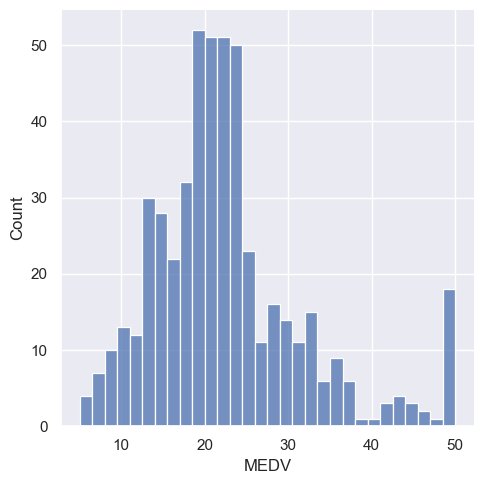

In [46]:
# Define o tamanho da figura para o gráfico
sns.set(rc={'figure.figsize':(11.7, 8.27)})

# Cria um histograma dos valores da coluna 'MEDV' com 30 bins (intervalos)
sns.displot(boston['MEDV'], bins=30)
plt.show() # Exibe o gráfico

In [47]:
# Calcula uma matriz de correlação entre as colunas do DataFrame 'boston' e arredonda os valores para duas casas decimais
correlation_matrix = boston.corr().round(2)

<AxesSubplot:>

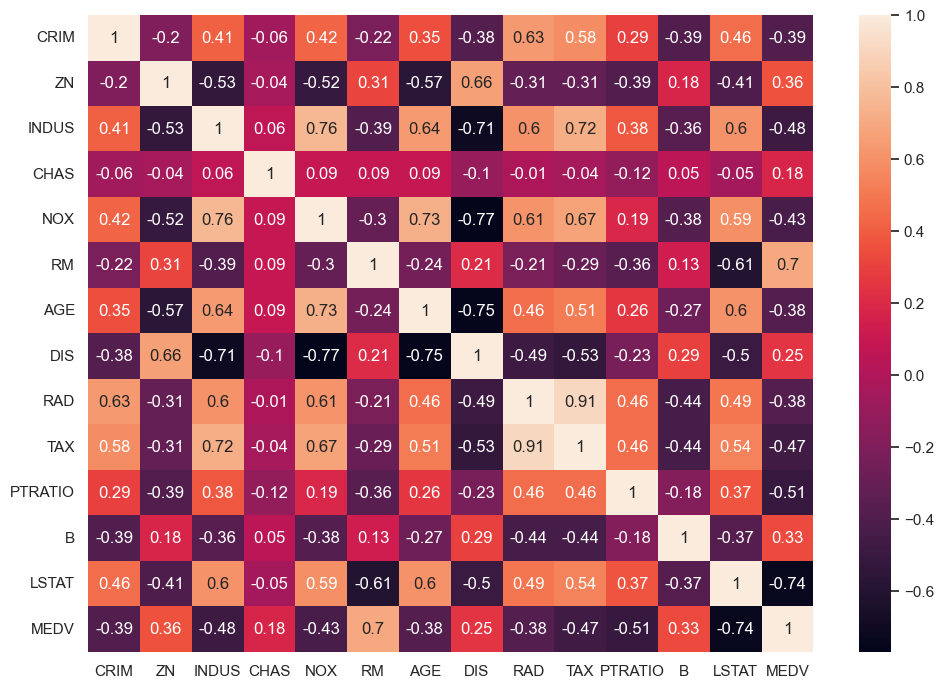

In [48]:
# Cria um mapa de calor (heatmap) para visualizar a matriz de correlação
# 'data' recebe a matriz de correlação 'correlation_matrix'
# 'annot=True' adiciona anotações aos quadrados do mapa de calor para mostrar os valores de correlação

sns.heatmap(data=correlation_matrix, annot=True)

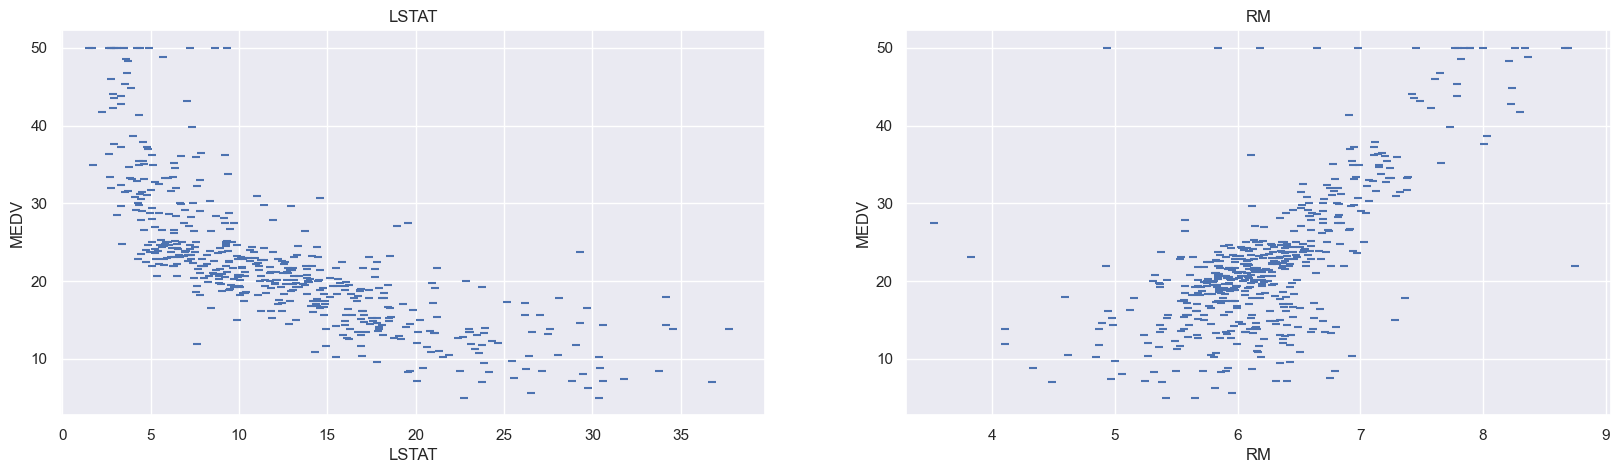

In [55]:
# Define o tamanho
plt.figure(figsize=(20,5))
# Lista de características (features) que serão usadas no gráfico de dispersão
features = ['LSTAT', 'RM']
# Variável-alvo (target)
target = boston['MEDV']

# Loop sobre as características
for i, col in enumerate(features):
    # Cria um subplot para cada característica
    plt.subplot(1, len(features), i+1)
    # Define os valores x e y para o gráfico de dispersão
    x= boston[col]
    y= target
    plt.scatter(x, y, marker=0) # Cria o gráfico de dispersão
    plt.title(col) # Define o título do subplot
    # Define os rótulos dos eixos x e y
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [50]:
# Cria o DataFrame 'X' com as colunas 'LSTAT' e 'RM'
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns= ['LSTAT', 'RM'])
# Cria o DataFrame 'Y' com a coluna 'MEDV' como variável-alvo
Y = boston['MEDV']

In [51]:
# Importa a função train_test_split da biblioteca sklearn.model_selection
from sklearn.model_selection import train_test_split
# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test =  train_test_split (X, Y, test_size = 0.2, random_state= 5)

# Imprime as dimensões dos conjuntos de treinamento e teste
print(X_train.shape) 
print(X_test.shape)
print(Y_train.shape) 
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [52]:
# Importa a classe LinearRegression da biblioteca sklearn.linear_model
from sklearn.linear_model import LinearRegression
# Importa as métricas mean_absolute_error e r2_score da biblioteca sklearn.metrics
from sklearn.metrics import mean_absolute_error, r2_score

# Cria um objeto de modelo de regressão linear
lin_model = LinearRegression()
# Treina o modelo de regressão linear com os dados de treinamento
lin_model.fit(X_train, Y_train)


LinearRegression()

O RMSE (Root Mean Squared Error) e o R² (R-squared) são duas métricas comuns usadas para avaliar o desempenho de modelos de regressão.
O RMSE é uma métrica que mede a média dos erros de previsão em unidades da variável dependente (ou variável-alvo). Quanto menor o RMSE, melhor o desempenho do modelo.
O R², também conhecido como coeficiente de determinação, mede a proporção da variabilidade na variável dependente (ou variável-alvo) que é explicada pelo modelo. Quanto maior o R², melhor o ajuste do modelo aos dados.

In [56]:
# Faz previsões nos dados de treinamento
y_train_predict = lin_model.predict(X_train)
# Calcula o RMSE (Root Mean Squared Error) nos dados de treinamento
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
# Calcula o R² nos dados de treinamento
r2 = r2_score(Y_train, y_train_predict)

# mostra as métricas de desempenho
print ("Modelo de treino perfomance")
print ("________________________")
print ('RMSE is {}'.format(rmse))
print ('r2 score is {}'.format(r2))
print ('\n')

# Faz previsões nos dados de teste
y_test_predict  = lin_model.predict(X_test)
# Calcula o RMSE nos dados de teste
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# Calcula o R² nos dados de teste
r2 = r2_score(Y_test, y_test_predict)

print ("Modelo de teste perfomance")
print ("________________________")
print ('RMSE is {}'.format(rmse))
print ('r2 score is {}'.format(r2))
print ('\n')

Modelo de treino perfomance
________________________
RMSE is 5.6371293350711955
r2 score is 0.6300745149331701


Modelo de teste perfomance
________________________
RMSE is 5.13740078470291
r2 score is 0.6628996975186954




<function matplotlib.pyplot.show(close=None, block=None)>

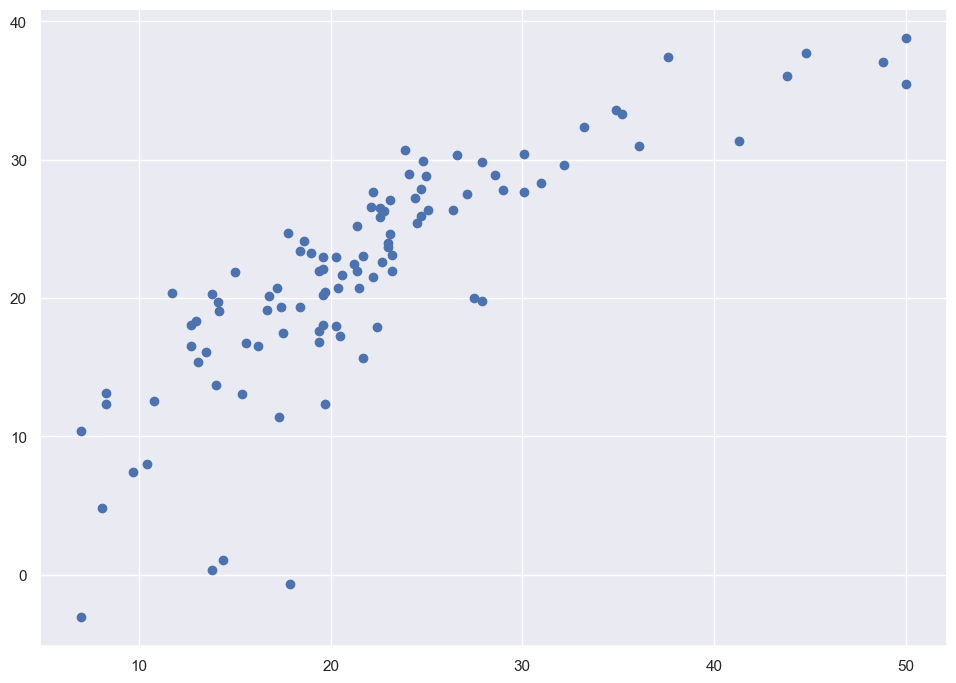

In [54]:
plt.scatter(Y_test, y_test_predict)
plt.show